# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np
import warnings, os

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000, na_values={'Primary Breed': ['Unknown'], 'Animal Name': ['Unknown', 'UNKNOWN']})
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape

(30000, 15)

In [4]:
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [5]:
f"Each row is an New York City dog licence. 'Animal Name' tells you the name of the dog and 'Vaccinated' tells you whether it has been vaccinated or not."

"Each row is an New York City dog licence. 'Animal Name' tells you the name of the dog and 'Vaccinated' tells you whether it has been vaccinated or not."

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

* The average age of dogs in NYC
* The distribution of dogs around the city by zipcode
* What is the most popular colour of dog?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [6]:
df['Primary Breed'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

<Axes: xlabel='Primary Breed'>

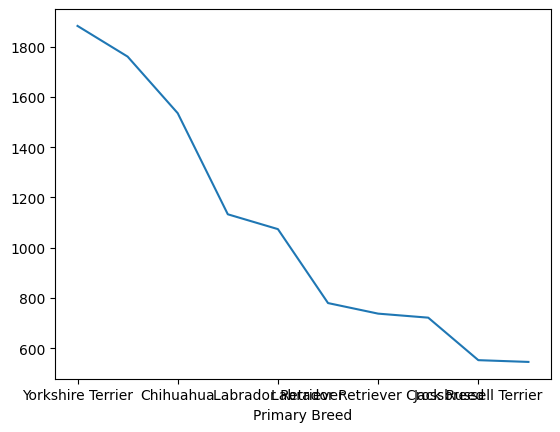

In [7]:
df['Primary Breed'].value_counts().head(10).plot()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

In [9]:
# Done, by adding this condition na_values={'Primary Breed': ['Unknown']} when I read in the file.

## What are the most popular dog names?

In [10]:
df['Animal Name'].value_counts().head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [11]:
df[df['Animal Name'].str.contains('Suz', na=False)]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
2177,11235,Suzie Huang,F,Shih Tzu,NaN,BROWN,WHITE,NaN,2011-03-01,Yes,No,Yes,2015-02-22 19:34:43.457,2015-02-22,2017-03-04
2934,10039,Suzu,F,Chihuahua,NaN,WHITE,BLACK,NaN,2011-01-01,Yes,No,Yes,2015-03-29 00:49:54.383,2015-03-29,2016-05-27
3664,10065,Suzy Q,F,Shih Tzu,NaN,BLOND,WHITE,NaN,2007-01-01,Yes,No,No,2015-04-14 11:30:39.603,2015-04-14,2016-04-29
4682,10040,Suzette,F,"Poodle, Toy",NaN,Orange,NaN,NaN,2012-08-01,Yes,No,Yes,2015-04-28 11:55:55.227,2015-04-28,2016-05-10
6095,10475,Suzee,F,Maltese,NaN,WHITE,NaN,NaN,2009-08-01,Yes,No,Yes,2015-05-06 06:38:37.977,2015-05-06,2016-05-13
6176,10034,Suzie,F,NaN,NaN,Black,NaN,NaN,2006-02-01,Yes,No,Yes,2015-05-06 15:50:32.317,2015-05-06,2016-04-29
12808,10314,Suzie,F,Golden Retriever,NaN,WHITE,CREAM,NaN,2011-04-01,Yes,No,Yes,2015-06-13 14:11:08.973,2015-06-13,2016-07-16
17852,11372,Suzuki,F,Shih Tzu,NaN,BLACK,WHITE,NaN,2010-01-01,Yes,No,Yes,2015-07-02 19:16:31.870,2015-07-02,2020-07-30
18021,11206,Suzy,F,Norfolk Terrier,NaN,TAN,WHITE,BLACK,2010-01-01,Yes,No,Yes,2015-07-03 21:14:10.557,2015-07-03,2017-07-30
20967,11229,Suzie-O,F,Bichon Frise,NaN,WHITE,NaN,NaN,2008-04-01,No,No,Yes,2015-07-17 11:42:47.677,2015-07-17,2016-08-17


In [12]:
df['Animal Name'].str.contains('Suz', na=False).sum()

np.int64(16)

In [13]:
(df['Animal Name'] == 'Max').sum()

np.int64(202)

In [14]:
(df['Animal Name'] == 'Maxwell').sum()

np.int64(11)

## What percentage of dogs are guard dogs?

In [15]:
# (df['Guard or Trained'] == 'Yes').sum()/df

(df['Guard or Trained'] == 'Yes').sum() / len(df) * 100

np.float64(0.05666666666666667)

## What are the actual numbers?

In [16]:
(df['Guard or Trained'] == 'Yes').sum()

np.int64(17)

In [17]:
(df['Guard or Trained'] == 'No').sum()

np.int64(19809)

In [18]:
(df['Guard or Trained'] == 'Yes').sum() + (df['Guard or Trained'] == 'No').sum()

np.int64(19826)

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [19]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

In [20]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

In [21]:
19809+10174+17

30000

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [26]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')

In [28]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [29]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [30]:
df['Animal Birth'].dtype

dtype('<M8[ns]')

In [31]:
df['Year'] = df['Animal Birth'].dt.year
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [32]:
# Went off date the data was last updated as using today's date doesn't make logical sense. 

reference_date = pd.Timestamp('2016-04-28')

df['Age'] = (reference_date - df['Animal Birth']).dt.days // 365

df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,8
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,3
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,1
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,8
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2


In [33]:
df['Age'].dtype

dtype('int64')

In [34]:
df['Age'].mean()

np.float64(6.243366666666667)

In [35]:
f"On average, the dogs were {df['Age'].mean():.2f} years old at the time the data was compiled."

'On average, the dogs were 6.24 years old at the time the data was compiled.'

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [36]:
hoods_df = pd.read_csv("zipcodes-neighborhoods.csv")
hoods_df.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [38]:
hoods_df.columns

Index(['neighborhood', 'zip', 'borough'], dtype='object')

In [39]:
merged_df = df.merge(hoods_df, left_on='Owner Zip Code', right_on='zip', how='left')
merged_df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,8,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,3,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,1,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,8,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2,Greenwich Village and Soho,10013.0,Manhattan


In [40]:
merged_df['zip'].dtype

dtype('float64')

In [41]:
merged_df.drop(columns=['zip'], inplace=True)
merged_df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,8,Upper West Side,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,3,Southeast Bronx,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,1,Greenwich Village and Soho,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,8,Upper West Side,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2,Greenwich Village and Soho,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [42]:
merged_df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date', 'Year', 'Age',
       'neighborhood', 'borough'],
      dtype='object')

In [43]:
merged_df[merged_df['borough'] == 'Bronx']['Animal Name'].value_counts().head(1)

Animal Name
Bella    22
Name: count, dtype: int64

In [44]:
merged_df[merged_df['borough'] == 'Brooklyn']['Animal Name'].value_counts().head(1)

Animal Name
Max    46
Name: count, dtype: int64

In [45]:
merged_df[merged_df['neighborhood'] == 'Upper East Side']['Animal Name'].value_counts().head(1)

Animal Name
Charlie    19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [47]:
merged_df['neighborhood'].unique()

array(['Upper West Side', 'Southeast Bronx', 'Greenwich Village and Soho',
       'East Harlem', 'Upper East Side', 'Sunset Park',
       'Gramercy Park and Murray Hill', 'Southwest Brooklyn',
       'Northwest Brooklyn', 'South Shore', 'Lower East Side',
       'Borough Park', 'East New York and New Lots', 'Central Brooklyn',
       'Kingsbridge and Riverdale', 'Chelsea and Clinton',
       'Stapleton and St. George', 'Northeast Queens',
       'Canarsie and Flatlands', 'Southern Brooklyn', 'Northwest Queens',
       'West Central Queens', 'Bronx Park and Fordham', 'Lower Manhattan',
       'High Bridge and Morrisania', 'Inwood and Washington Heights',
       'Jamaica', 'Greenpoint', 'Northeast Bronx', 'Central Harlem',
       'Central Queens', 'Bushwick and Williamsburg', 'North Queens',
       'Mid-Island', 'Southeast Queens', nan, 'West Queens',
       'Port Richmond', 'Rockaways', 'Southwest Queens', 'Flatbush',
       'Hunts Point and Mott Haven', 'Central Bronx'], dtype=object)

In [49]:
top_breeds = (merged_df.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(1).reset_index(name='count'))
top_breeds

,neighborhood,Primary Breed,count
0,Borough Park,Yorkshire Terrier,49
1,Bronx Park and Fordham,Yorkshire Terrier,39
2,Bushwick and Williamsburg,Yorkshire Terrier,47
3,Canarsie and Flatlands,Shih Tzu,56
4,Central Bronx,Yorkshire Terrier,29
5,Central Brooklyn,Shih Tzu,52
6,Central Harlem,Chihuahua,48
7,Central Queens,Yorkshire Terrier,34
8,Chelsea and Clinton,Chihuahua,80
9,East Harlem,Yorkshire Terrier,44


## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [50]:
breed_neut_stats = (merged_df.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).unstack(fill_value=0).sort_values(by='No', ascending=False).reset_index())

breed_neut_stats[['Primary Breed', 'No']].head(10)

Spayed or Neut,Primary Breed,No
0,Canaan Dog,1.0
1,Borzoi,1.0
2,Dogo Argentino,1.0
3,Treeing Tennessee Brindle,1.0
4,Fila Brasileiro,1.0
5,French Spaniel,1.0
6,Karelian Bear Dog,1.0
7,Polish Hound,1.0
8,Kooikerhondje,1.0
9,Mudi,1.0


In [52]:
breed_gender_neut_stats = (merged_df.groupby(['Primary Breed', 'Animal Gender'])['Spayed or Neut'].value_counts(normalize=True).unstack(fill_value=0).reset_index().sort_values(by='No', ascending=False))

breed_gender_neut_stats.head(10)

Spayed or Neut,Primary Breed,Animal Gender,No,Yes
0,Affenpinscher,F,1.0,0.0
188,Fila Brasileiro,M,1.0,0.0
78,Borzoi,F,1.0,0.0
252,Kooikerhondje,F,1.0,0.0
281,"Mastiff, French (Dogue de Bordeaux)",F,1.0,0.0
282,"Mastiff, French (Dogue de Bordeaux)",M,1.0,0.0
251,Kerry Blue Terrier,M,1.0,0.0
286,"Mastiff, Tibetan",F,1.0,0.0
287,"Mastiff, Tibetan",M,1.0,0.0
289,Miniature American Shepherd,M,1.0,0.0


## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

In [54]:
merged_df['borough'].value_counts()

borough
Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: count, dtype: int64

<Axes: ylabel='borough'>

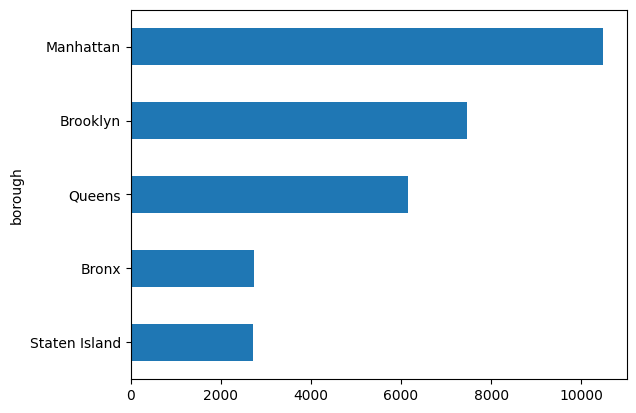

In [56]:
merged_df['borough'].value_counts().sort_values(ascending=True).plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [57]:
boro_df = pd.read_csv("boro_population.csv")
boro_df.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [59]:
merge2_df = merged_df.merge(boro_df, left_on='borough', right_on='borough', how='left')
merge2_df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,borough,population,area_sqmi
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,8,Upper West Side,Manhattan,1644518.0,23.0
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,...,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,3,Southeast Bronx,Bronx,1455444.0,42.0
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,...,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,1,Greenwich Village and Soho,Manhattan,1644518.0,23.0
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,...,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,8,Upper West Side,Manhattan,1644518.0,23.0
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,...,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2,Greenwich Village and Soho,Manhattan,1644518.0,23.0


In [60]:
merge2_df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date', 'Year', 'Age',
       'neighborhood', 'borough', 'population', 'area_sqmi'],
      dtype='object')

In [64]:
dog_counts = merge2_df['borough'].value_counts()
dog_counts

borough
Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: count, dtype: int64

In [65]:
populations = merge2_df.groupby('borough')['population'].first()
populations

borough
Bronx            1455444.0
Brooklyn         2636735.0
Manhattan        1644518.0
Queens           2339150.0
Staten Island     474558.0
Name: population, dtype: float64

In [66]:
merge2_df['population'] = merge2_df['population'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [69]:
# Looks like some zipcodes are missing from the csv I read in earlier. Attempt to clean that up follows. UPDATE: I tried and failed. 

nan_rows = merge2_df[merge2_df['population'].isna()]
nan_rows

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,borough,population,area_sqmi
172,11249,Lola Reyes,F,Shih Tzu,NaN,WHITE,BROWN,BLACK,2010-07-01,Yes,...,No,2014-09-22 16:41:32.603,2014-09-22,2016-10-13,2010,5,NaN,NaN,NaN,NaN
258,11109,Parker,F,NaN,Border Collie X,WHITE,BLACK,BROWN,2008-02-01,Yes,...,Yes,2014-09-29 22:26:29.077,2014-09-29,2016-10-19,2008,8,NaN,NaN,NaN,NaN
298,10282,Maxi,M,"Poodle, Toy",NaN,Tan,Gold,NaN,2013-09-01,Yes,...,Yes,2014-10-03 15:19:37.843,2014-10-03,2016-10-03,2013,2,NaN,NaN,NaN,NaN
688,10282,Papi Chulo,M,Havanese,NaN,WHITE,CREAM,NaN,2010-08-01,Yes,...,Yes,2014-10-27 21:50:52.497,2014-10-27,2017-11-24,2010,5,NaN,NaN,NaN,NaN
689,11109,Sophie,F,Boxer,NaN,Tan,White,Black,2010-11-01,Yes,...,Yes,2014-10-27 22:12:52.120,2014-10-27,2016-10-27,2010,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29808,10069,Chloe Madison,F,NaN,Peekapoo,BLOND,WHITE,NaN,2010-02-01,Yes,...,Yes,2015-08-21 16:01:32.947,2015-08-21,2016-05-12,2010,6,NaN,NaN,NaN,NaN
29809,10069,Louise Lexington,F,Havanese,NaN,BLACK,TAN,WHITE,2013-01-01,Yes,...,No,2015-08-21 16:04:20.303,2015-08-21,2016-05-30,2013,3,NaN,NaN,NaN,NaN
29821,11249,Maya Wichowska,F,German Shepherd Dog,NaN,BLACK,TAN,NaN,2004-01-01,Yes,...,Yes,2015-08-21 16:36:13.130,2015-08-21,2016-09-03,2004,12,NaN,NaN,NaN,NaN
29893,10282,GOLDIE,M,Chihuahua,NaN,Tan,White,NaN,2015-05-01,No,...,No,2015-08-22 12:39:28.597,2015-08-22,2016-08-22,2015,0,NaN,NaN,NaN,NaN


In [70]:
inf_rows = merge2_df[np.isinf(merge2_df['population'])]
inf_rows

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,borough,population,area_sqmi


In [71]:
unique_zips_with_nan_borough = merge2_df.loc[merge2_df['borough'].isna(), 'Owner Zip Code'].unique()
unique_zips_with_nan_borough

array([11249, 11109, 10282, 10125, 10069, 10101, 10150, 10708, 10107,
       10185,  1175, 11518, 10068, 11023, 11001, 12237, 11040, 11202,
       10901, 10113, 10705, 10156, 11757, 22223, 11003, 10311, 10276,
       11242, 11386, 12333, 11630, 11002, 10118, 10159, 53494, 14432,
       33130, 11783, 10606, 11784,  1003, 11756, 10162, 11024, 11520,
       90802, 10129, 10950, 10163, 10008, 10151, 93036, 11944,  8110,
       10274, 10155, 11580, 11550, 11305, 10512, 11609, 10042, 11336,
       11581, 14420, 11753])

In [72]:
zips_5digit = [str(z) for z in unique_zips_with_nan_borough if len(str(z)) == 5]

In [73]:
nyc_zip_to_borough = {
    # Manhattan
    **dict.fromkeys(['10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038', '10039', '10040'], 'Manhattan'),
    
    # Brooklyn
    **dict.fromkeys(['11201', '11203', '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211', '11212', '11213', '11214', '11215', '11216', '11217', '11218', '11219', '11220', '11221', '11222', '11223', '11224', '11225', '11226', '11228', '11229', '11230', '11231', '11232', '11233', '11234', '11235', '11236', '11237', '11238', '11239'], 'Brooklyn'),

    # Queens
    **dict.fromkeys(['11004', '11005', '11101', '11102', '11103', '11104', '11105', '11106', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11361', '11362', '11363', '11364', '11365', '11366', '11367', '11368', '11369', '11370', '11371', '11372', '11373', '11374', '11375', '11377', '11378', '11379', '11385', '11411', '11412', '11413', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11422', '11423', '11426', '11427', '11428', '11429', '11432', '11433', '11434', '11435', '11436', '11691', '11692', '11693', '11694', '11695', '11697'], 'Queens'),

    # Bronx
    **dict.fromkeys(['10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10473', '10474', '10475'], 'Bronx'),

    # Staten Island
    **dict.fromkeys(['10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '10309', '10310', '10311', '10312', '10314'], 'Staten Island'),
}

In [74]:
boroughs_for_zips = {z: nyc_zip_to_borough.get(z, 'Unknown') for z in zips_5digit}

In [75]:
for zip_code, borough in boroughs_for_zips.items():
    print(f"{zip_code}: {borough}")

11249: Unknown
11109: Unknown
10282: Unknown
10125: Unknown
10069: Unknown
10101: Unknown
10150: Unknown
10708: Unknown
10107: Unknown
10185: Unknown
11518: Unknown
10068: Unknown
11023: Unknown
11001: Unknown
12237: Unknown
11040: Unknown
11202: Unknown
10901: Unknown
10113: Unknown
10705: Unknown
10156: Unknown
11757: Unknown
22223: Unknown
11003: Unknown
10311: Staten Island
10276: Unknown
11242: Unknown
11386: Unknown
12333: Unknown
11630: Unknown
11002: Unknown
10118: Unknown
10159: Unknown
53494: Unknown
14432: Unknown
33130: Unknown
11783: Unknown
10606: Unknown
11784: Unknown
11756: Unknown
10162: Unknown
11024: Unknown
11520: Unknown
90802: Unknown
10129: Unknown
10950: Unknown
10163: Unknown
10008: Unknown
10151: Unknown
93036: Unknown
11944: Unknown
10274: Unknown
10155: Unknown
11580: Unknown
11550: Unknown
11305: Unknown
10512: Unknown
11609: Unknown
10042: Unknown
11336: Unknown
11581: Unknown
14420: Unknown
11753: Unknown


In [ ]:
# End of attempt to clean up missing zip code and borough pairings. 

In [76]:
dogs_per_capita = dog_counts / populations
dogs_per_capita

borough
Bronx            0.001888
Brooklyn         0.002832
Manhattan        0.006371
Queens           0.002631
Staten Island    0.005746
dtype: float64

In [77]:
dogs_per_capita = dogs_per_capita.sort_values(ascending=False)

dogs_per_capita

borough
Manhattan        0.006371
Staten Island    0.005746
Brooklyn         0.002832
Queens           0.002631
Bronx            0.001888
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [79]:
breed_counts = (merge2_df.groupby(['borough', 'Primary Breed']).size().reset_index(name='count'))

top5_breeds = (breed_counts.sort_values(['borough', 'count'], ascending=[True, False]).groupby('borough').head(5))
top5_breeds

,borough,Primary Breed,count
145,Bronx,Yorkshire Terrier,250
128,Bronx,Shih Tzu,244
41,Bronx,Chihuahua,208
7,Bronx,American Pit Bull Terrier/Pit Bull,181
90,Bronx,Maltese,139
353,Brooklyn,Yorkshire Terrier,501
325,Brooklyn,Shih Tzu,481
198,Brooklyn,Chihuahua,391
262,Brooklyn,Labrador Retriever,255
267,Brooklyn,Maltese,247


<Axes: title={'center': 'Top 5 Dog Breeds in Each Borough'}, ylabel='Primary Breed'>

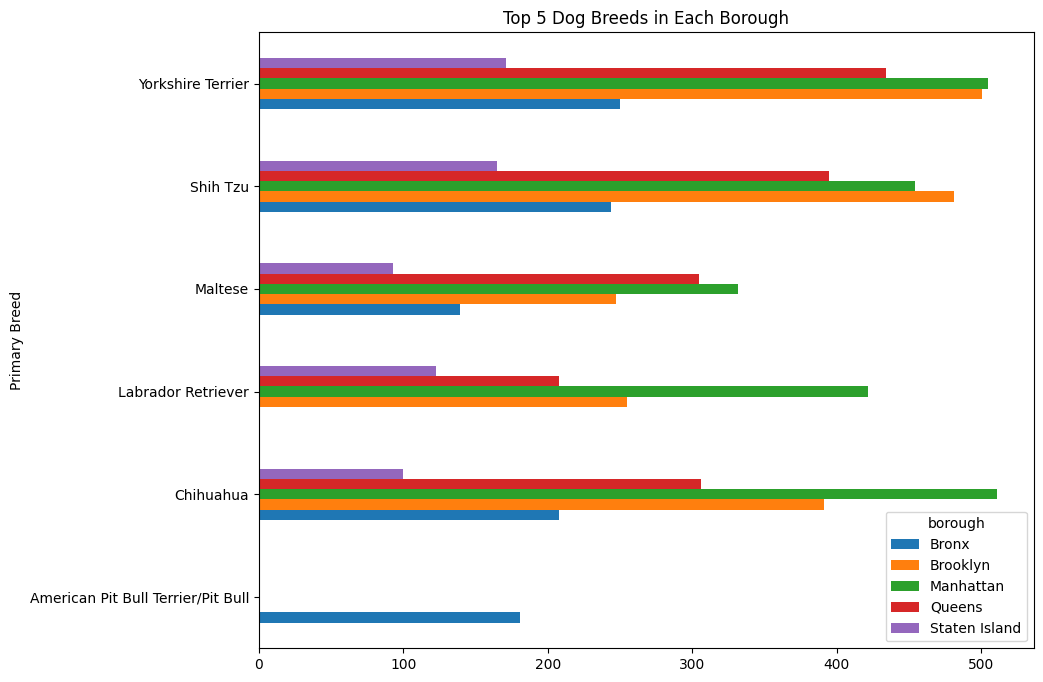

In [80]:
top5_breeds.pivot(index='Primary Breed', columns='borough', values='count').plot(kind='barh', figsize=(10, 8), title='Top 5 Dog Breeds in Each Borough')

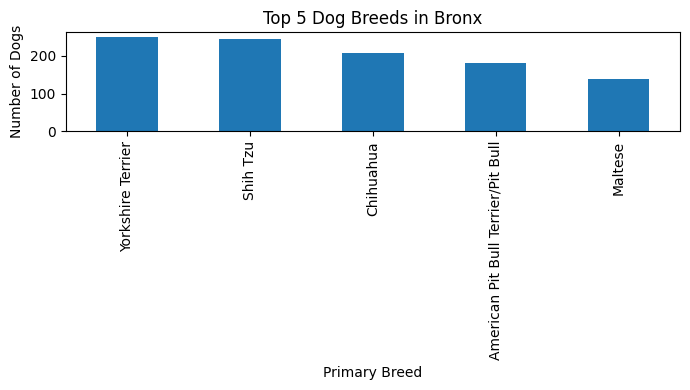

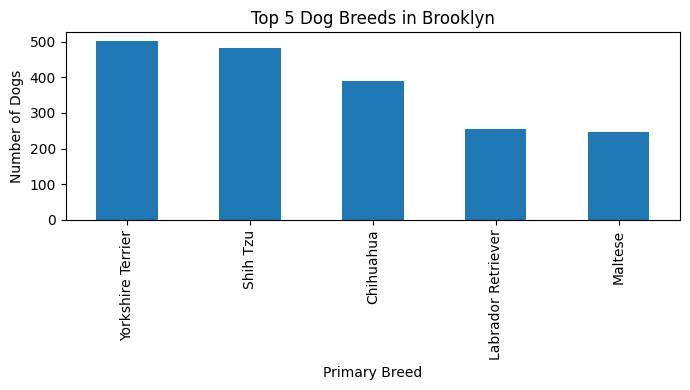

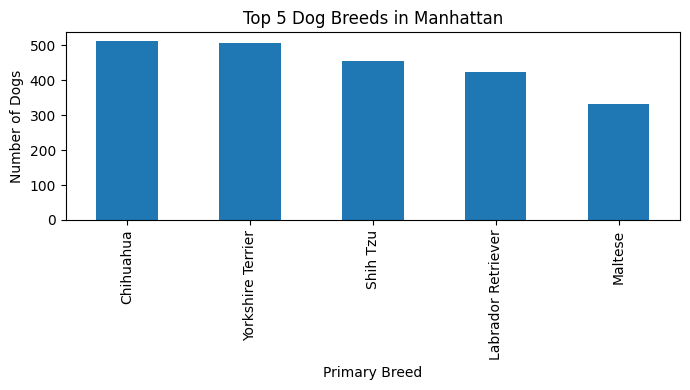

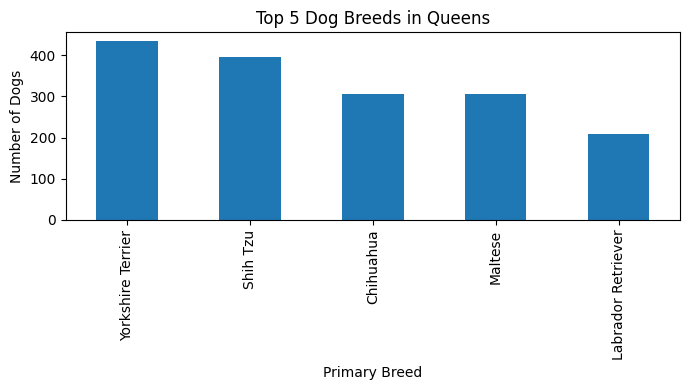

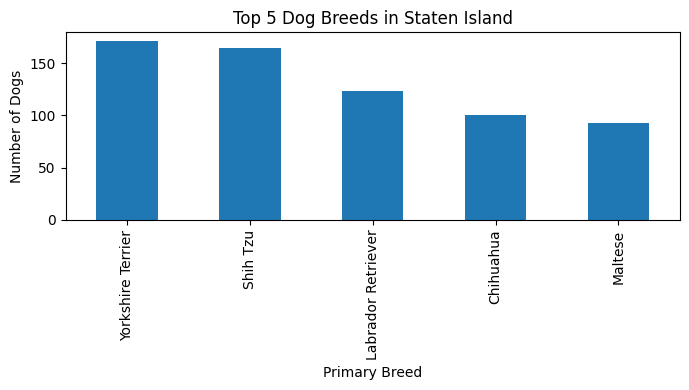

In [81]:
import matplotlib.pyplot as plt

for boro in top5_breeds['borough'].unique():
    boro_data = top5_breeds[top5_breeds['borough'] == boro]
    boro_data.plot(
        kind='bar',
        x='Primary Breed',
        y='count',
        legend=False,
        title=f'Top 5 Dog Breeds in {boro}',
        figsize=(7, 4)
    )
    plt.ylabel('Number of Dogs')
    plt.tight_layout()
    plt.show()